### Fashion MNIST 데이터 셋 - CNN 망 훈련하기 

In [37]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout

In [2]:
from tensorflow.keras.models import Model

In [3]:
input_tensor = Input(shape=(28, 28, 1)) # 여기서 Flatten이 필요 없고 채널을 추가해줌.
x = Conv2D(4, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(input_tensor) #파라미터는 아웃풋 개수, 커널사이즈(커널 크기), 스트라이드(간격), 패딩(크기 맞추기) 등등이 있다. 또한 activation으로 아웃풋에대한 처리 가능

In [4]:
x # 28, 28이 4개가 나옴

<KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer 'conv2d')>

In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
import numpy as np
train_images = np.array(train_images/255.0, dtype=np.float32) #minmaxscale못함
test_images = np.array(test_images/255.0, dtype=np.float32)

In [8]:
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [9]:
test_oh_labels.shape

(10000, 10)

## Pooling 적용

In [10]:
input_tensor = Input(shape=(28, 28, 1)) # 여기서 Flatten이 필요 없고 채널을 추가해줌.
x = Conv2D(4, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x) # 절반으로 줄었다. 대부분 pool_size랑 stride는 동일하게 쓴다. 따로 써도 되긴하는데 왠만해서 동일하다.

In [11]:
x

<KerasTensor: shape=(None, 14, 14, 4) dtype=float32 (created by layer 'max_pooling2d')>

## CNN 모델 생성

In [56]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy #정답이 one-hot encoding 되어 있을 때
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [48]:
tf.keras.backend.clear_session() #기존에 있던 모델 클리어

input_tensor = Input(shape = (28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(x) # valid는 패딩 False와 같음
x = MaxPooling2D(2)(x)

print(x.shape)
x = Flatten()(x)
print(x.shape)
x = Dropout(0.4)(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)


(None, 13, 13, 64)
(None, 10816)


In [49]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               2163

In [53]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, validation_data=(test_images, test_oh_labels), epochs=20, batch_size=100 ) #validation_split=0.2,

Epoch 1/20
600/600 [==============================] - 10s 15ms/step - loss: 0.1071 - accuracy: 0.9599 - val_loss: 0.2305 - val_accuracy: 0.9252
Epoch 2/20
600/600 [==============================] - 9s 15ms/step - loss: 0.1005 - accuracy: 0.9624 - val_loss: 0.2273 - val_accuracy: 0.9257
Epoch 3/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0966 - accuracy: 0.9642 - val_loss: 0.2264 - val_accuracy: 0.9255
Epoch 4/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0901 - accuracy: 0.9660 - val_loss: 0.2255 - val_accuracy: 0.9291
Epoch 5/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0884 - accuracy: 0.9672 - val_loss: 0.2396 - val_accuracy: 0.9262
Epoch 6/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0817 - accuracy: 0.9696 - val_loss: 0.2470 - val_accuracy: 0.9281
Epoch 7/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0777 - accuracy: 0.9710 - val_loss: 0.2422 - val_accuracy: 0.928

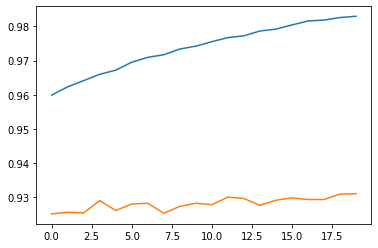

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')

In [55]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 1s 13ms/step - loss: 0.2823 - accuracy: 0.9311


[0.28228244185447693, 0.9311000108718872]

In [36]:
train_images.shape
#  loss: 0.2365 - accuracy: 0.9238 - 20번

(60000, 28, 28)